In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

In [ ]:
df=pd.read_csv("customers.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,190
Age,0
Graduated,102
Profession,162
Work_Experience,1098
Spending_Score,0
Family_Size,448
Var_1,108


In [ ]:
df=df.drop('ID',axis=1)
df=df.drop('Var_1',axis=1)

In [ ]:
df=df.dropna(axis=0)

In [ ]:
for i in ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Segmentation']:
    print(i,":",list(df[i].unique()))

Gender : ['Male', 'Female']
Ever_Married : ['No', 'Yes']
Graduated : ['No', 'Yes']
Profession : ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor', 'Homemaker', 'Entertainment', 'Marketing', 'Executive']
Spending_Score : ['Low', 'High', 'Average']
Segmentation : ['D', 'B', 'C', 'A']


In [ ]:
Clist=[['Male', 'Female'],['No', 'Yes'],['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']]
enc = OrdinalEncoder(categories=Clist)

In [ ]:
df[['Gender','Ever_Married','Graduated','Profession',
        'Spending_Score']] = enc.fit_transform(df[['Gender','Ever_Married',
                                                   'Graduated','Profession',
                                                    'Spending_Score']])

In [ ]:
le = LabelEncoder()
df['Segmentation'] = le.fit_transform(df['Segmentation'])

In [ ]:
scaler=MinMaxScaler()
df[['Age']]=scaler.fit_transform(df[['Age']])

In [ ]:
X=df.iloc[:,:-1]
Y=df[['Segmentation']]

In [ ]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0.0,0.0,0.056338,0.0,0.0,1.0,0.0,4.0
2,1.0,1.0,0.690141,1.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.690141,1.0,2.0,0.0,2.0,2.0
5,0.0,1.0,0.535211,0.0,3.0,0.0,1.0,2.0
6,0.0,0.0,0.197183,1.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...
10689,1.0,0.0,0.239437,1.0,6.0,1.0,0.0,2.0
10690,0.0,0.0,0.154930,0.0,0.0,9.0,0.0,4.0
10691,1.0,0.0,0.239437,1.0,4.0,1.0,0.0,1.0
10693,0.0,1.0,0.408451,1.0,8.0,1.0,2.0,5.0


In [ ]:
ohe=OneHotEncoder()
Y=ohe.fit_transform(Y).toarray()

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.33,random_state=42)

In [ ]:
model=Sequential([Dense(6,activation='relu',input_shape=[8]),
                  Dense(10,activation='relu'),
                  Dense(10,activation='relu'),
                  Dense(4,activation='softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])

In [19]:
model.fit(xtrain,ytrain,epochs=2000,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2520 - loss: 1.4441 - val_accuracy: 0.3277 - val_loss: 1.3705
Epoch 2/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3574 - loss: 1.3581 - val_accuracy: 0.3491 - val_loss: 1.3488
Epoch 3/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3790 - loss: 1.3269 - val_accuracy: 0.3641 - val_loss: 1.3179
Epoch 4/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3808 - loss: 1.3004 - val_accuracy: 0.3828 - val_loss: 1.2954
Epoch 5/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4207 - loss: 1.2674 - val_accuracy: 0.3982 - val_loss: 1.2851
Epoch 6/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4261 - loss: 1.2515 - val_accuracy: 0.4050 - val_loss: 1.2799
Epoch 7/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4288 - loss: 1.2456 - val_accuracy: 0.3985 - val_loss: 1.2799
Epoch 8/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4294 - loss: 1.2416 - 

<Axes: >

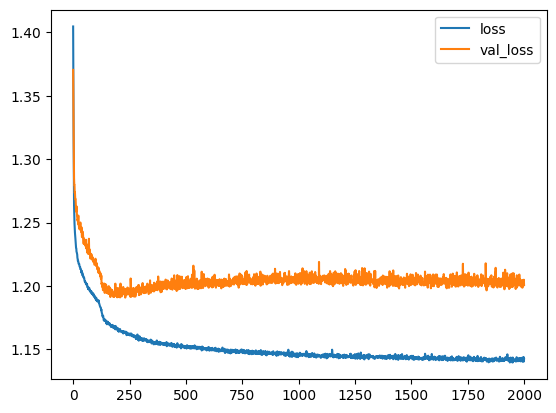

In [20]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

In [21]:
ypred = np.argmax(model.predict(xtest), axis=1)
ytrue = np.argmax(ytest,axis=1)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [22]:
print(confusion_matrix(ytrue,ypred))
print(classification_report(ytrue,ypred))

[[343 173  95 188]
 [223 220 156  88]
 [114 166 285  90]
 [189  65  43 498]]
              precision    recall  f1-score   support

           0       0.39      0.43      0.41       799
           1       0.35      0.32      0.34       687
           2       0.49      0.44      0.46       655
           3       0.58      0.63      0.60       795

    accuracy                           0.46      2936
   macro avg       0.45      0.45      0.45      2936
weighted avg       0.46      0.46      0.46      2936



In [23]:
x_single_prediction = np.argmax(model.predict(X[3:4]), axis=1)
print(x_single_prediction)
print(le.inverse_transform(x_single_prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[2]
['C']


In [24]:
X[3:4]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
5,0.0,1.0,0.535211,0.0,3.0,0.0,1.0,2.0


In [25]:
Y[3:4]

array([[0., 0., 1., 0.]])